# Tip Prediction Using Multiple Linear Regression

In [33]:
## Import Package
import sklearn #scikit-learn
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
## Import Dataset
df_tips=sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<hr>

## SIMPLE LINEAR REGRESSION

### QUICK TASK
- Build Simple Linear Regression with Total Bill as *feature* dan Tip as *target*
- Perform Error Analysis
- Use Histogram to see distribution of Error

In [35]:
## Import package
from sklearn import linear_model

In [36]:
## Build Model and fit into feature and target
Model=linear_model.LinearRegression()
Model.fit(df_tips[['total_bill']],df_tips['tip'])

LinearRegression()

In [37]:
## Define tip target and append to DataFrame
df_tips['target_tip']=Model.predict(df_tips[['tip']]).round(2)
df_tips['selisih']=abs(df_tips['tip']-df_tips['target_tip'])
df_tips['selisih(%)']=(df_tips['selisih']/df_tips['tip']*100).round(2)
df_tips

,total_bill,tip,sex,smoker,day,time,size,target_tip,selisih,selisih(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,1.03,0.02,1.98
1,10.34,1.66,Male,No,Sun,Dinner,3,1.09,0.57,34.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1.29,2.21,63.14
3,23.68,3.31,Male,No,Sun,Dinner,2,1.27,2.04,61.63
4,24.59,3.61,Female,No,Sun,Dinner,4,1.30,2.31,63.99
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.54,4.38,73.99
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.13,0.87,43.50
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.13,0.87,43.50
242,17.82,1.75,Male,No,Sat,Dinner,2,1.10,0.65,37.14


In [38]:
## Check Mean of Error
df_tips['selisih'].mean()

1.7636475409836068

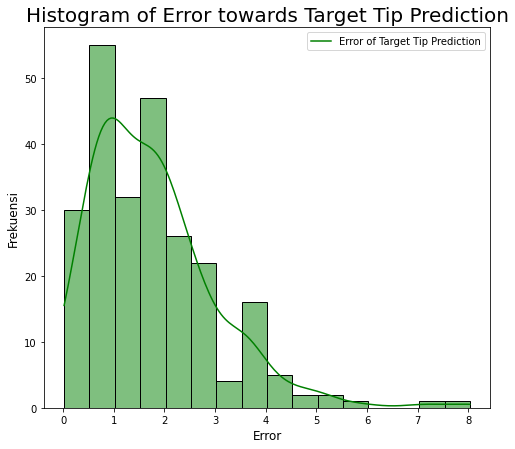

In [39]:
## Use Histogram to visualize distribution of Error
plt.figure(figsize=(8,7))
sns.histplot(df_tips['selisih'],bins=16,color='green',kde=True)
plt.title('Histogram of Error towards Target Tip Prediction',size=20)
plt.xlabel('Error',size=12)
plt.ylabel('Frekuensi',size=12)
plt.legend(['Error of Target Tip Prediction'],loc=0)
plt.show()
## Result: Error did not normally distributed, normally we expect good Model have normally distributed Error

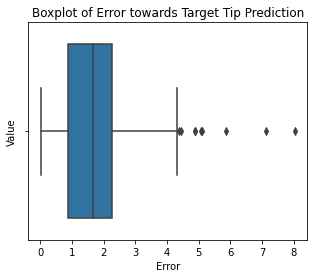

In [40]:
## Use Boxplot to visualize outliers of error
plt.figure(figsize=(5,4))
sns.boxplot(df_tips['selisih'])
plt.title('Boxplot of Error towards Target Tip Prediction')
plt.xlabel('Error')
plt.ylabel('Value')
plt.show()
## Result: Error (predicted tip - actual tip) above 4.0 categorize as outliers and affect prediction result of tip 

<hr>

## `MULTIPLE LINEAR REGRESSION`

### Data Understanding

In [41]:
## Re-Import Dataset
df_tips=sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
## Describe Every Columns
TipsDesc=[]
for i in df_tips.columns:
    TipsDesc.append([
        i,
        df_tips[i].dtypes,
        df_tips[i].isna().sum(),
        round((df_tips[i].isna().sum()/len(df_tips))*100,2),
        df_tips[i].nunique(),
        df_tips[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(data=TipsDesc,columns=['Features','DataType','Null','Null(%)','Unique','UniqueSample'])
## Result: No missing value, 7 total columns, 3 numeric columns, 4 categorical columns

,Features,DataType,Null,Null(%),Unique,UniqueSample
0,total_bill,float64,0,0.0,229,"[14.31, 12.69]"
1,tip,float64,0,0.0,123,"[2.6, 6.0]"
2,sex,category,0,0.0,2,"['Male', 'Female'] Categories (2, object): ['M..."
3,smoker,category,0,0.0,2,"['Yes', 'No'] Categories (2, object): ['Yes', ..."
4,day,category,0,0.0,4,"['Sun', 'Thur'] Categories (4, object): ['Thur..."
5,time,category,0,0.0,2,"['Lunch', 'Dinner'] Categories (2, object): ['..."
6,size,int64,0,0.0,6,"[4, 2]"


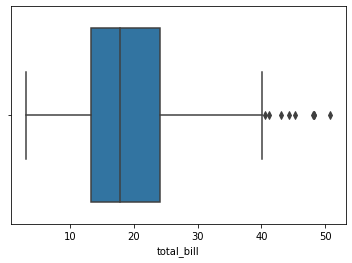

In [43]:
## Check Outliers Total Bill
sns.boxplot(df_tips['total_bill'])
plt.show()
## Result: There are outliers

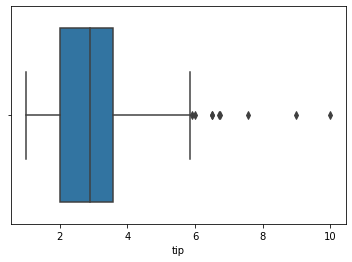

In [44]:
## Check Outliers Tip
sns.boxplot(df_tips['tip'])
plt.show()
## Result: There are outliers

### FEATURE SELECTION
    - Because there are only 2 features columns and both of them have quite appropriate correlation to tip, therefore we use both of them as the features.

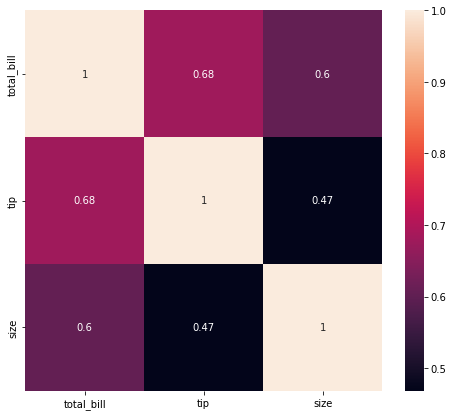

In [45]:
## Correlation Test with HeatMap
plt.figure(figsize=(8,7))
sns.heatmap(df_tips.corr('spearman'),annot=True)
plt.show()
## Result: Use spearman (outliers detected), we only analyze correlation all columns with 'tip'.

### Machine Learning

#### Splitting Dataset

In [46]:
# Define features and target
df=df_tips[['total_bill','tip','size']]
x=df.drop(columns='tip')
y=df['tip']

In [47]:
# Import package
from sklearn.model_selection import train_test_split

In [48]:
# Use package to randomly split data into training data and testing data with 75%:25% proportion
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25) 

In [49]:
## Question for Mock-Up Test
x_train.head()

,total_bill,size
69,15.01,2
158,13.39,2
160,21.50,4
36,16.31,3
152,17.26,3


In [50]:
## Question for Real Test
x_train.head()

,total_bill,size
69,15.01,2
158,13.39,2
160,21.50,4
36,16.31,3
152,17.26,3


In [51]:
## Define shape of x_train
x_train.shape

(183, 2)

In [52]:
## Define shape of x_test
x_test.shape

(61, 2)

In [53]:
## Question for Real Test
x_test.head()

,total_bill,size
189,23.10,3
95,40.17,4
176,17.89,2
184,40.55,2
201,12.74,2


In [54]:
## Answer Key for Mock-Up Test
y_train.head()

69     2.09
158    2.61
160    3.50
36     2.00
152    2.74
Name: tip, dtype: float64

In [55]:
## Answer Key for Real Test
y_test.head()

189    4.00
95     4.73
176    2.00
184    3.00
201    2.01
Name: tip, dtype: float64

#### Machine Learning Modelling

In [56]:
## Import package
from sklearn.linear_model import LinearRegression

In [57]:
## Define Model
Model = LinearRegression(fit_intercept=False)
## Target (tip) is certainly has zero value when total bill or restaurant size is 0

In [58]:
# Learning Mode -> finding pattern from question-answer of Training Data
Model.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [59]:
## QUICK EVALUATION MATRIX - Training Data
print(f'Quick Evaluation Matrix Value for Training Data= {Model.score(x_train,y_train)}')
# Check Evaluation Matrix score of Training Data

Quick Evaluation Matrix Value for Training Data= 0.41274104373734755


In [60]:
## QUICK EVALUATION MATRIX - Testing Data
print(f'Quick Evaluation Matrix Value for Testing Data= {Model.score(x_test,y_test)}')
# Check Evaluation Matrix score of Testing Data

Quick Evaluation Matrix Value for Testing Data= 0.5190412794195918


In [61]:
## Answer Key for Training Question
Model.predict(x_train)

array([2.26707824, 2.08883338, 3.59672055, 2.71789554, 2.82242184,
       2.62466823, 5.41327772, 2.68818806, 2.19005885, 2.84802444,
       3.48119148, 2.14934861, 4.06463446, 2.07673033, 1.80056083,
       2.17245442, 4.07974211, 1.93809544, 3.25013333, 2.64967837,
       2.04592258, 2.91734188, 7.14672165, 2.87002998, 2.13504501,
       4.22387838, 4.23077628, 3.48999369, 2.85873098, 6.51385085,
       2.84142278, 3.08238342, 2.76000229, 2.34189706, 3.33434683,
       2.08663282, 2.42551811, 2.30778848, 1.46717693, 2.32429263,
       2.7545009 , 1.75324892, 3.22292263, 1.98870818, 1.89298409,
       3.57090636, 3.09008536, 3.81537942, 2.42331756, 1.92159129,
       3.22101831, 4.04343297, 5.06118911, 2.51794137, 1.8445719 ,
       1.10548206, 2.41121451, 3.06147816, 2.27257962, 2.97976144,
       2.23627048, 2.57185494, 0.64556631, 3.25893554, 2.62246767,
       3.84898019, 2.31879125, 3.04548182, 1.72354145, 2.09213421,
       2.48493306, 2.97426005, 5.62063759, 3.87289005, 2.06352

In [62]:
## Answer Key for Test Question
Model.predict(x_test)

array([3.46498355, 5.65093753, 2.58395798, 5.07718544, 2.01731538,
       3.93670611, 2.71489093, 3.11869256, 4.18866952, 2.05992995,
       1.24822182, 2.0019115 , 2.00851316, 1.86767772, 3.5213939 ,
       4.63618599, 4.36390978, 1.53429382, 2.73549997, 2.04592258,
       2.71569498, 3.10989034, 3.11979283, 2.92034649, 2.40571312,
       1.9017863 , 4.23547361, 1.98320679, 1.74554698, 2.30558793,
       5.11070157, 2.24727325, 1.69163342, 6.07094707, 1.66632705,
       2.62686878, 2.57625604, 5.91309966, 2.44862392, 3.23502568,
       5.12551298, 1.77195363, 1.89078353, 3.57061013, 1.44737194,
       4.52425398, 3.04937511, 1.82806775, 2.94374853, 2.01951593,
       4.79602237, 1.96450209, 2.06103022, 1.86437689, 4.11744775,
       1.74774754, 2.70689277, 2.15595027, 1.75214865, 2.54214746,
       2.27037907])

In [63]:
# Y = Z + aTotal_bill + bSize
print(f'Constanta value (Z)= {Model.intercept_}') # will be 0 because fit_intercept=False
print(f'a and b value= {Model.coef_}')
print(f'Features: {x_train.columns}')
pd.DataFrame(data=Model.coef_,index=x_train.columns,columns=['Coef']) ## Coefficient from every columns

Constanta value (Z)= 0.0
a and b value= [0.11002769 0.3077813 ]
Features: Index(['total_bill', 'size'], dtype='object')


,Coef
total_bill,0.110028
size,0.307781


<hr>

## EVALUATION MATRIX

In [64]:
## Variable for Predicted Features in Training Data
pred_train=Model.predict(x_train)

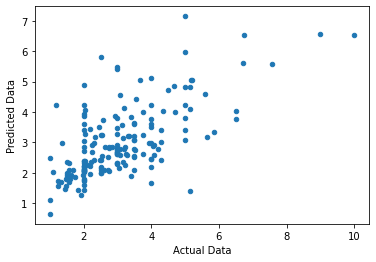

In [65]:
## Visualization with Scatterplot
plt.scatter(y_train,pred_train,s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [66]:
## Variable for Predicted Features in Testing Data
pred_test=Model.predict(x_test)

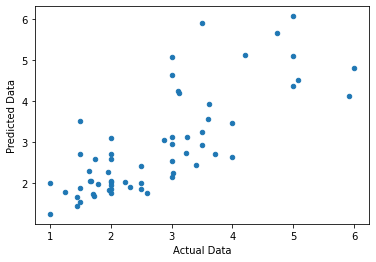

In [67]:
## Visualization with Scatterplot
plt.scatter(y_test,pred_test,s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [68]:
## Combine question and answers as one set
training_set=pd.concat([x_train,y_train],axis=1)
testing_set=pd.concat([x_test,y_test],axis=1)

## Define Error from Predicted and Actual Data
training_set['tip_pred']=pred_train
training_set['error']=abs(training_set['tip']-training_set['tip_pred'])

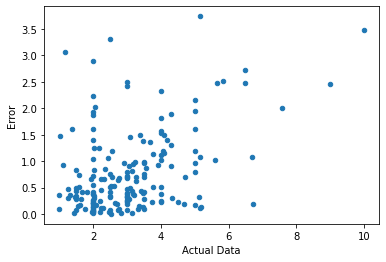

In [69]:
## Visualization
plt.scatter(training_set['tip'],training_set['error'],s=20)
plt.xlabel('Actual Data')
plt.ylabel('Error')
plt.show()

<hr>

## Error Distribution
#### Good model have normally distributed error with mean value of 0

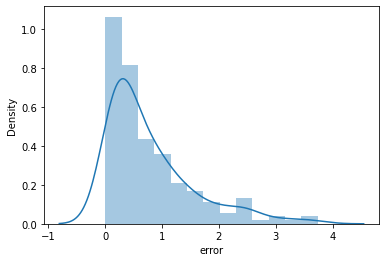

In [70]:
# Visualize Data Distribution with Histogram
sns.distplot(training_set['error'])
plt.show()
# Not Normally Distributed

In [71]:
training_set['error'].mean()
# Mean of error not 0 or close to 0

0.7825870999517822

<hr>

## EVALUATION MATRIX FOR REGRESSION

In [72]:
## Import Package
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [73]:
## MODEL FOR MOCK-UP TEST
pred_train=Model.predict(x_train)

## Calculate Evaluation Matrix with Every Alternatives
r2_train=r2_score(y_train,pred_train)
MAE_train=mean_absolute_error(y_train,pred_train)
MSE_train=mean_squared_error(y_train,pred_train)
RMSE_train=np.sqrt(MSE_train)

## Print Result
print('Evaluation Matrix Result for Training Data:')
print('='*50)
print(f'R-Squared = {r2_train.round(2)}') ## Result: Not as required (0.85)
print(f'Mean Absolute Error = {MAE_train.round(2)}')
print(f'Mean Squared Error = {MSE_train.round(2)}')
print(f'Root Mean Squared Error = {RMSE_train.round(2)}')


Evaluation Matrix Result for Training Data:
R-Squared = 0.41
Mean Absolute Error = 0.78
Mean Squared Error = 1.2
Root Mean Squared Error = 1.09


In [74]:
## MODEL FOR REAL TEST
pred_test=Model.predict(x_test)

## Calculate Evaluation Matrix with Every Alternatives
r2_test=r2_score(y_test,pred_test)
MAE_test=mean_absolute_error(y_test,pred_test)
MSE_test=mean_squared_error(y_test,pred_test)
RMSE_test=np.sqrt(MSE_test)

## Print Result
print('Evaluation Matrix Result for Training Data:')
print('='*50)
print(f'R-Squared = {r2_test.round(2)}')  ## Result: Not as required (0.85)
print(f'Mean Absolute Error = {MAE_test.round(2)}')
print(f'Mean Squared Error = {MSE_test.round(2)}')
print(f'Root Mean Squared Error = {RMSE_test.round(2)}')


Evaluation Matrix Result for Training Data:
R-Squared = 0.52
Mean Absolute Error = 0.62
Mean Squared Error = 0.69
Root Mean Squared Error = 0.83


In [75]:
## Training vs Test
data={
    'Training':[r2_train,MAE_train,MSE_train,RMSE_train],
    'Testing':[r2_test,MAE_test,MSE_test,RMSE_test],
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
pd.DataFrame(data,index=['R-Squared','MAE','MSE','RMSE']).round(2)

,Training,Testing,Range,Indicator
R-Squared,0.41,0.52,-~ to 1,Closer to 1 the better
MAE,0.78,0.62,0 to ~,Closer to 0 the better
MSE,1.20,0.69,0 to ~,Closer to 0 the better
RMSE,1.09,0.83,0 to ~,Closer to 0 the better


<hr>

## IMPROVEMENT MACHINE LEARNING
### Project Limitation / Feature Engineering

In [76]:
# PROJECT LIMITATION
training_set.sort_values('error',ascending=False).head(10)
## Take out 10 data with highest Error, then analyze those errors
### Insight: there is no exact pattern on the error

,total_bill,size,tip,tip_pred,error
172,7.25,2,5.15,1.413263,3.736737
170,50.81,3,10.00,6.513851,3.486149
102,44.30,3,2.50,5.797571,3.297571
237,32.83,2,1.17,4.227772,3.057772
187,30.46,5,2.00,4.890350,2.890350
183,23.17,4,6.50,3.780467,2.719533
88,24.71,2,5.85,3.334347,2.515653
207,38.73,4,3.00,5.492498,2.492498
214,28.17,3,6.50,4.022824,2.477176
181,23.33,2,5.65,3.182509,2.467491


### Encoding

In [77]:
## Determine Categorical Columns
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [78]:
## Define unique value and its frequency in column 'sex'
df_tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [79]:
## Encode every gender type into numeric value
df_tips['gender_enc']=df_tips['sex'].map({'Male':1,'Female':2})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,2


In [80]:
## Define unique value and its frequency in column 'smoker'
df_tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [81]:
## Encode every smoker type into numeric value
df_tips['smoker_enc']=df_tips['smoker'].map({'No':0,'Yes':1})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc,smoker_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0


In [82]:
## Define unique value and its frequency in column 'day'
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [83]:
## Encode every day type into numeric value
df_tips['day_enc']=df_tips['day'].map({'Thur':1,'Fri':2,'Sat':3,'Sun':4})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc,smoker_enc,day_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0,4
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,4
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,4
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,4
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0,4


In [84]:
## Define unique value and its frequency in column 'time'
df_tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [85]:
## Encode every day type into numeric value
df_tips['time_enc']=df_tips['time'].map({'Lunch':0,'Dinner':1})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc,smoker_enc,day_enc,time_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0,4,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,4,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,4,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,4,1
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0,4,1


In [86]:
## Convert all encoded columns into integer
df_tips['gender_enc']=df_tips['gender_enc'].astype('int64')
df_tips['smoker_enc']=df_tips['smoker_enc'].astype('int64')
df_tips['day_enc']=df_tips['day_enc'].astype('int64')
df_tips['time_enc']=df_tips['time_enc'].astype('int64')
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
gender_enc       int64
smoker_enc       int64
day_enc          int64
time_enc         int64
dtype: object

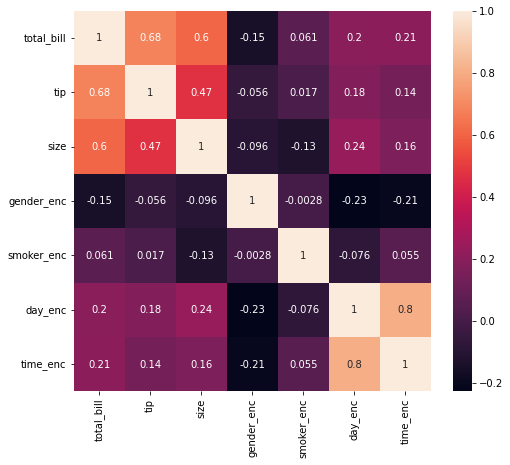

In [87]:
## Correlation Test with HeatMap
plt.figure(figsize=(8,7))
sns.heatmap(df_tips.corr('spearman'),annot=True)
plt.show()
## Result: Use spearman (outliers detected), we only analyze correlation all columns with 'tip'.
### Gender, smoker, day, and time has low correlation to tips, cannot be used for machine learning.

- Insight:
    - Encoding is not feasible because all other columns were not reliable to be selected as features